# Product Sales Analysis

In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import calendar
from itertools import combinations
from collections import Counter

ModuleNotFoundError: No module named 'ittertools'

# Merging Months data 

In [2]:
# Utils 
# Getting city from address 
def get_city(address):
    return address.split(',')[1]

# Getting state from address 
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [4]:
# Checking for values 
# To convert Quantity, Price into int 
sales_data = pd.read_csv("all_data_copy.csv")
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
sales_data.head()   

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning Data

In [6]:
# Checking for NAN, very less, remove 40/120000

sales_data.isnull().value_counts()
sales_data = sales_data.dropna(how = 'all')

In [7]:
# Removing "OR" in Order Date
sales_data = sales_data[sales_data['Order Date'].str[0:2]!='Or']

In [8]:
# Coverting to right variables 

sales_data["Price Each"] = pd.to_numeric(sales_data["Price Each"])
sales_data["Quantity Ordered"] = pd.to_numeric(sales_data["Quantity Ordered"])

# Augmenting Months

In [9]:
# Get Month for analysis 
sales_data["Month"] = sales_data["Order Date"].str[0:2]
sales_data["Month"]= sales_data["Month"].astype('int32')
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])

In [10]:
# Get Area for analysis 
sales_data["Area"]= sales_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


In [11]:
# Get time and date for analysis 
sales_data["Hour"]= sales_data["Order Date"].dt.hour
sales_data["Time"]= sales_data["Order Date"].dt.time

In [12]:
# Getting total cost for analysis 
sales_data["Total Sales"]=sales_data["Price Each"]*sales_data["Quantity Ordered"]

# Buisness Questions 

# The best month for sales ?


In [13]:
# getting month name
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
# Sorting by column 'Country'
sales_data = sales_data.sort_values(by=['Month'])

In [15]:
sales_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Area,Hour,Time,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,Dallas (TX),8,08:46:00,23.90
12252,188243,Lightning Charging Cable,1,14.95,2019-04-05 22:24:00,"650 13th St, Seattle, WA 98101",Apr,Seattle (WA),22,22:24:00,14.95
12253,188244,Bose SoundSport Headphones,1,99.99,2019-04-03 16:23:00,"357 Cedar St, New York City, NY 10001",Apr,New York City (NY),16,16:23:00,99.99
12254,188245,Lightning Charging Cable,1,14.95,2019-04-17 09:36:00,"780 12th St, Atlanta, GA 30301",Apr,Atlanta (GA),9,09:36:00,14.95
12255,188246,AA Batteries (4-pack),1,3.84,2019-04-07 14:11:00,"670 Pine St, Boston, MA 02215",Apr,Boston (MA),14,14:11:00,3.84


In [16]:
# December seems to have the highest sales

sum_sales = sales_data.groupby(['Month']).sum()['Total Sales']
sum_sales

Month
Apr    3390670.24
Aug    2244467.88
Dec    4613443.34
Feb    2202022.42
Jan    1822256.73
Jul    2647775.76
Jun    2577802.26
Mar    2807100.38
May    3152606.75
Nov    3199603.20
Oct    3736726.88
Sep    2097560.13
Name: Total Sales, dtype: float64

Text(0, 0.5, 'Total Sales in US($)')

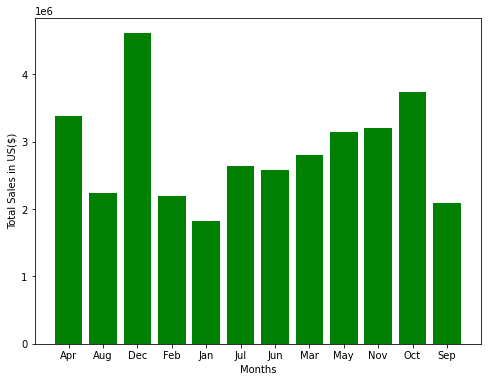

In [17]:
# Figure out the items that are sold the most  
keys = [month for month, df in sales_data.groupby(['Month'])]
plt.figure(figsize=(8,6))
plt.bar(keys, sum_sales , color="Green")
plt.xlabel("Months")
plt.ylabel("Total Sales in US($)") 

# Cities with the highest sales

In [18]:
# The state with the highest sales is San Fransisco
sum_sales = sales_data.groupby(by="Area").sum()
sum_sales

,Quantity Ordered,Price Each,Hour,Total Sales
Area,,,,
Atlanta (GA),16602,2779908.20,214264,2795498.58
Austin (TX),11153,1809873.61,141946,1819581.75
Boston (MA),22528,3637409.77,288225,3661642.01
Dallas (TX),16730,2752627.82,214390,2767975.40
Los Angeles (CA),33289,5421435.23,427444,5452570.80
New York City (NY),27932,4635370.83,357696,4664317.43
Portland (ME),2750,447189.25,35211,449758.27
Portland (OR),11303,1860558.22,144421,1870732.34
San Francisco (CA),50239,8211461.74,643265,8262203.91


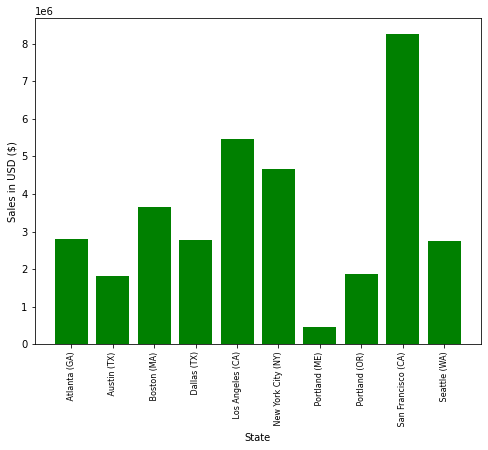

In [19]:
# Plot 
keys = [city for city, df in sales_data.groupby(['Area'])]
plt.figure(figsize=(8,6))
plt.bar(keys, sales_data.groupby(['Area']).sum()['Total Sales'], color ="Green")
plt.ylabel('Sales in USD ($)')
plt.xlabel('State')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

# Time to display advertisement to maximise our customers

In [20]:
# Counting the distinct hour and sales 
sales_data.groupby(['Hour']).count().head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Area,Time,Total Sales
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243


In [21]:
# Creating a variable count to understand the number of orders being made 
sales_data['Count'] = 1

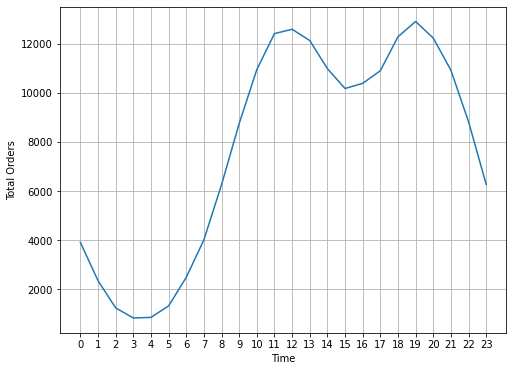

In [22]:
keys = [pair for pair, df in sales_data.groupby(['Hour'])]
plt.figure(figsize=(8,6))
plt.plot(keys, sales_data.groupby(["Hour"]).count()["Count"])
plt.xticks(keys)
plt.grid()
plt.ylabel('Total Orders')
plt.xlabel('Time')
plt.show()
# Seems like 11 am and 7 pm happens to be a good time to sale 

## What Products are mostly sold together ?

In [23]:
sales_data["Order ID"].value_counts()

160873    5
196615    4
263918    4
312462    4
235798    4
         ..
150505    1
150506    1
150507    1
150508    1
259357    1
Name: Order ID, Length: 178437, dtype: int64

In [36]:
# Checking for orders that repeated themseleves 
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

C:\Users\vinay\AppData\Local\Temp\ipykernel_7572\468275261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
12279,188269,"iPhone, 27in FHD Monitor"
12230,188222,"AAA Batteries (4-pack), AA Batteries (4-pack)"
12337,188326,"Bose SoundSport Headphones, Lightning Charging..."
12353,188340,"Bose SoundSport Headphones, Wired Headphones"
12345,188332,"USB-C Charging Cable, Vareebadd Phone"
...,...,...
178979,251818,"27in FHD Monitor, Flatscreen TV"
178847,251690,"Google Phone, Wired Headphones"
179083,251920,"Google Phone, USB-C Charging Cable"
179085,251921,"USB-C Charging Cable, AAA Batteries (4-pack)"


In [42]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 649
('Google Phone', ' USB-C Charging Cable') 625
('USB-C Charging Cable', ' Google Phone') 325
('Lightning Charging Cable', ' iPhone') 323
('iPhone', ' Wired Headphones') 262
('Google Phone', ' Wired Headphones') 234
('iPhone', ' Apple Airpods Headphones') 219
('Vareebadd Phone', ' USB-C Charging Cable') 218
('Wired Headphones', ' iPhone') 193
('Wired Headphones', ' Google Phone') 176


# Product sold the most 

In [60]:
product_group = sales_data.groupby("Product")
quantity_sold = product_group.sum()['Quantity Ordered']

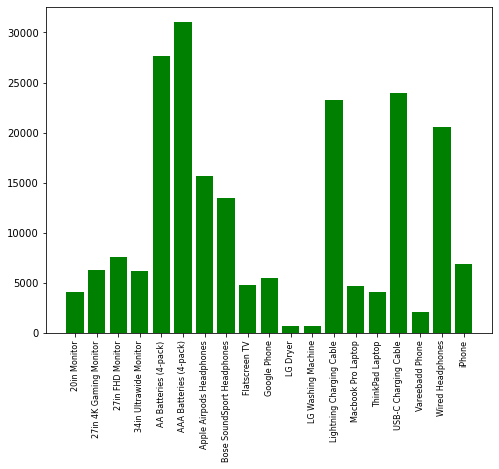

In [65]:
# Plot - Which Product are most often sold together?
keys = [pair for pair, df in product_group]
plt.figure(figsize=(8,6))
plt.bar(keys, quantity_sold, color='Green')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [66]:
# Ploting Price as well 

In [71]:
prices = product_group.mean('Price Each')